<center><h2>Explainable Machine Learning 2023/2024Z</h2></center>
<center><h3>Homework 1</h3></center>

Mateusz Szymański

## Introduction

The goal of the homework is to train, evaluate, compare and comment some classifiers of choice on a specified dataset.

We've chosen a very simple models, each in a default setting:
* a logistic regression (from `sklearn`)
* a random forest classifier (from `sklearn`)
* `XGBoostClassifier` from `xgboost`
* `TabPFN` from `tabpfn`

No hyperparameters tuning has been used.

## Dataset selection

We've chosen the `phoneme.csv` dataset, consisting of 5 unnamed columns, which probably describe amplitudes of certain harmonics.

The target value is a binary value (corresponding presumably to `nasal` or `oral` vowels). Initially, the target variable used two classes: `1` and `2`. We converted these values to the range `{0, 1}` as required by `XGBoostClassifier`.

Each input column is normalized, that is of a zero mean and a normalized variance `1`. The classes are slightly imbalanced, with only approximately $30\%$ of values equal to `1`.

There were no missing values in the dataset. The random state has been fixed for reproducibility.

### Train-test split

We used a standard method of dividing the dataset into train-test data. We chose to use only $25\%$ of the data as training data because `TabPFN` complained about the input size being too large.

## Results

### Accuracy

The most natural metric for a classification task is **accuracy**. We employ that one for comparing the performance of all chosen models.

| model | accuracy |
|-------------|-----|
| `LogisticRegression` | 76.56% |
| `RandomForestClassifier`| 87.02% |
| `XGBClassifier`| 85.66% |
| `TabPFNClassifier` | 86.23% |

The best-performing model among all the vanilla models is the `RandomForestClassifier` outperforming all other models. The difference between the best results for all models, except the logistic regression, is relatively small.
 
The logistic regression model barely exceeded the score of a constant model $70.65\%$. 

Even for the best model there is still a room for improvement. However, without further analysis and data exploration is rather hard to estimate the achievable upper bound of the accuracy.

### Confusion matrix

Accuracy alone is insufficient for comparing all models adequately. An useful technique is to examine the confusion matrices of all presented models, which reveal the models' biases and in what direction.

The confusion matrix shows that the top three models share similar characteristics in terms of the amount of false positives and false negatives. There is a slight bias towards false positives for all models among the wrong answers.

#### LogisticRegression

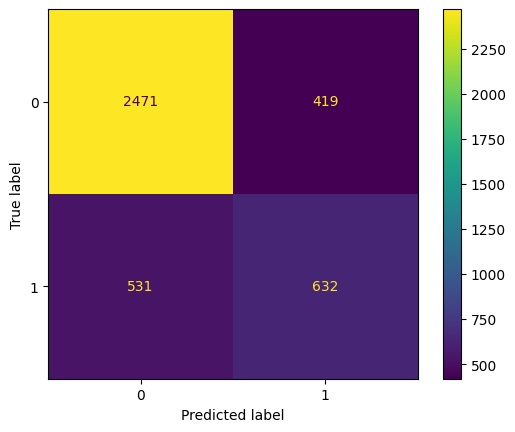</img>

#### XGBClassifier

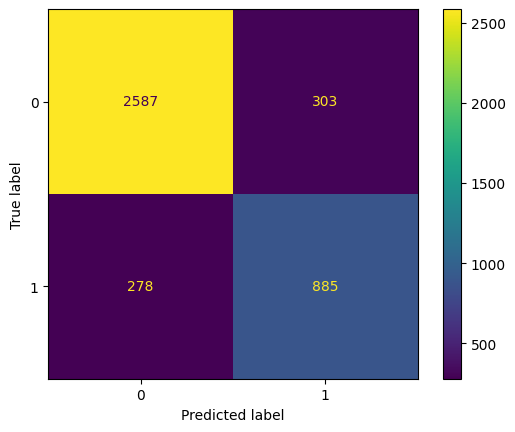</img>

#### TabPFN

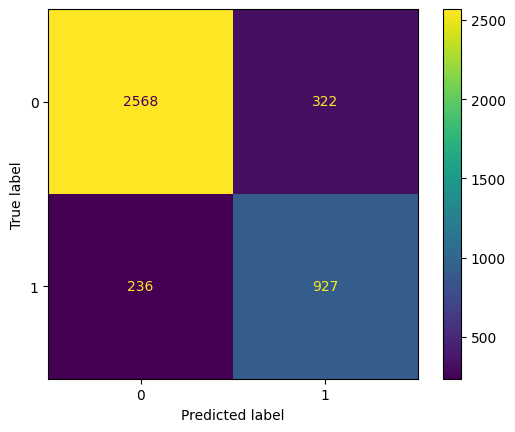</img>

#### Random forest

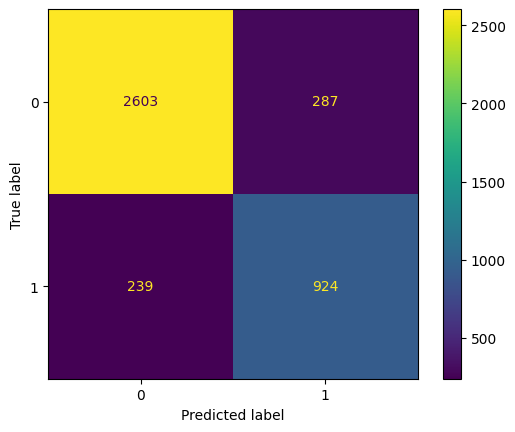</img>

The basic drawback from using confusion matrices is that there is no linear order between matrices. To put simply, there is no way of comparing two outcomes.

## $F_1$ score

A compromise between *precision* and *recall* is $F_1$ score which is a harmonic mean of these two.

| model | $F_1$ score |
|-------------|-----|
| `LogisticRegression` | 57.09% |
| `RandomForestClassifier`| 77.84% |
| `XGBClassifier`| 75.29% |
| `TabPFNClassifier` | 76.87% |

As we have seen from confusion matrices, it is not a surprise that $F_1$ score is similar for all three models. Once again, the `RandomForestClassifier` leads in performance.

## Conclusion

The basic models have been compared using fundamental tools. We haven't considered other aspects of these models beyond relatively simple performance metrics. Of course, there are other metrics like AUC ROC for comparing the performance of given models that haven't been considered.

### Further steps

There are several ways to improve the quality of chosen models. One way is hyperparameter tuning for finding better model hyperparameters (e.g. the number of trees for `RandomForestClassifier`, batch size for `TabPFN` or learning rate in general).

To better understand in which cases (or classes of cases) the models failed and why, a more detailed analysis is needed. At this moment, it is not even clear if the proposed models are suitable for the given task.

## Appendix

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier

In [2]:
RANDOM_STATE = 42

In [4]:
df = pd.read_csv('datasets/phoneme.csv').iloc[:, 1:]
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy() - 1

assert tuple(sorted(np.unique(y))) == (0, 1)

In [68]:
print('Constant model accuracy: {:.2f}%.'.format(100 * (1 - np.sum(y == 1) / len(y))))

Constant model accuracy: 70.65%.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.75, random_state=RANDOM_STATE
)

In [56]:
def fit_and_measure(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, **kwargs):
    model.fit(X_train, y_train, **kwargs)
    y_pred = model.predict(X_test)
    accuracy = (y_test == y_pred).mean()
    matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, matrix, f1

In [58]:
def display_f1_score(f1_score):
    print('F1-score: {:.2f}%.'.format(100 * f1_score))

In [59]:
def display_accuracy(accuracy):
    print('Accuracy: {:.2f}%.'.format(100 * accuracy))

In [57]:
def plot_confusion_matrix(matrix):
    ConfusionMatrixDisplay(matrix).plot()
    return

In [60]:
def display_results(accuracy, f1_score, matrix):
    display_accuracy(accuracy)
    display_f1_score(f1_score)
    plot_confusion_matrix(matrix)

Accuracy: 76.56%.
F1-score: 57.09%.


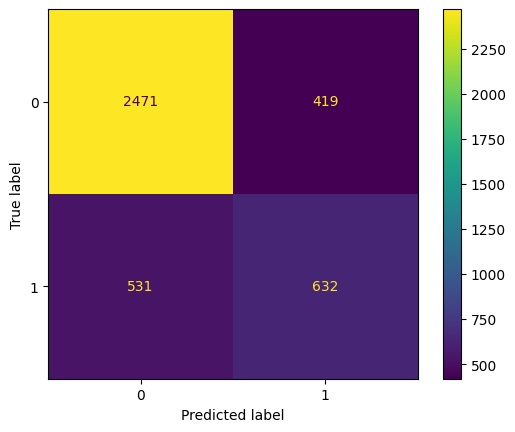

In [61]:
logistic_regression = LogisticRegression(random_state=RANDOM_STATE)
logistic_regression_accuracy, logistic_regression_matrix, logistic_regression_f1 = fit_and_measure(logistic_regression)
display_results(logistic_regression_accuracy, logistic_regression_f1, logistic_regression_matrix)

Accuracy: 87.02%.
F1-score: 77.84%.


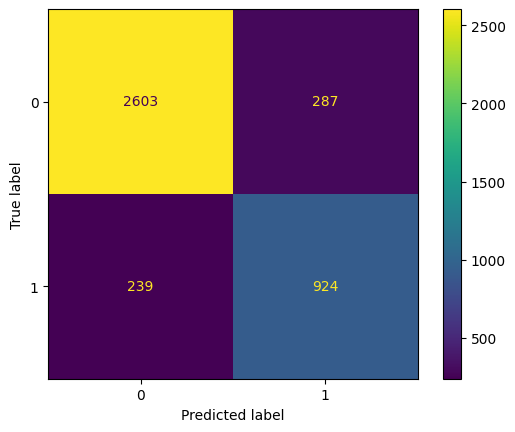

In [62]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
random_forest_accuracy, random_forest_matrix, random_forest_f1 = fit_and_measure(random_forest)
display_results(random_forest_accuracy, random_forest_f1, random_forest_matrix)

Accuracy: 85.66%.
F1-score: 75.29%.


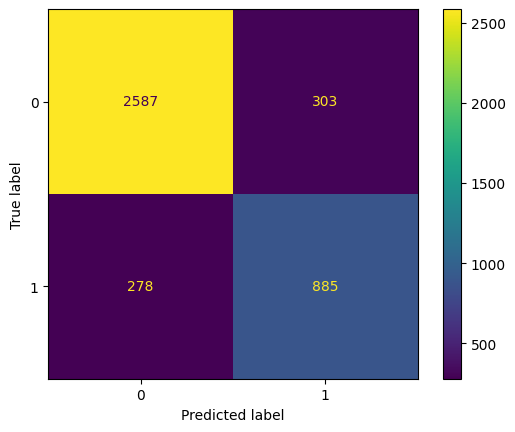

In [63]:
xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb_accuracy, xgb_matrix, xgb_f1 = fit_and_measure(xgb)
display_results(xgb_accuracy, xgb_f1, xgb_matrix)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Accuracy: 86.23%.
F1-score: 76.87%.


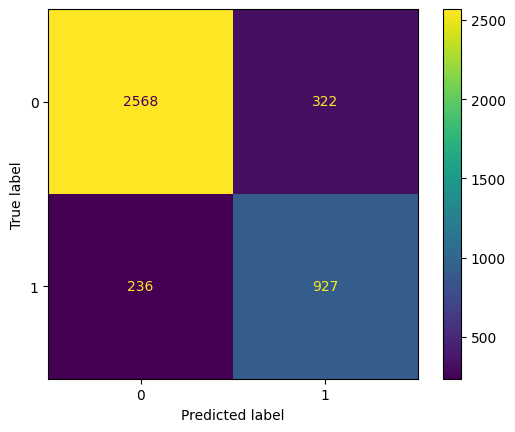

In [64]:
tab_pfn = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
tab_pfn_accuracy, tab_pfn_matrix, tab_pfn_f1 = fit_and_measure(tab_pfn, overwrite_warning=True)
display_results(tab_pfn_accuracy, tab_pfn_f1, tab_pfn_matrix)